# Human Activity Recognition


In this project we will design a robust activity recogonition system based on the smartphones.
As you know mobile devices have accelerometer as the sensor which collects the activities.
These activities can be classified using K-nearest neighbour. 


In [1]:
# import the standard libraries
import pandas as pd #Data processing and I/O operation
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt

%matplotlib inline

#Import the machine libraries
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Import the Dataset

In [ ]:
train = shuffle(pd.read_csv('train.csv'))
test = shuffle(pd.read_csv('test.csv'))

In [3]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2316,0.261179,-0.025127,-0.117305,-0.525010,-0.136907,-0.091163,-0.551619,-0.129501,-0.096306,-0.410440,...,-0.631589,0.104407,0.020087,-0.007979,-0.056756,-0.539805,0.264285,0.294785,14,WALKING
2928,0.279150,-0.016542,-0.103187,-0.998320,-0.995825,-0.989598,-0.998538,-0.995534,-0.989643,-0.942588,...,-0.823881,-0.033598,0.286345,-0.441434,0.419990,-0.876471,0.117900,0.105728,16,SITTING
2802,0.312485,-0.035493,-0.073317,-0.193736,0.310060,-0.546220,-0.279317,0.270843,-0.515979,0.116829,...,-0.810003,-0.382280,0.485032,0.664387,-0.955229,-0.794245,0.236496,-0.016143,15,WALKING
2173,0.184068,-0.036504,-0.155034,0.181310,0.139975,-0.365648,0.102442,0.078827,-0.386982,0.557403,...,-0.935403,0.490992,0.819356,-0.471596,-0.581152,-0.817815,0.214464,-0.032261,11,WALKING_DOWNSTAIRS
3461,0.280105,-0.013478,-0.096017,-0.984498,-0.980187,-0.972681,-0.992749,-0.982122,-0.970922,-0.895096,...,-0.840093,0.092356,0.409086,-0.880046,0.493466,-0.649157,0.324810,0.104202,17,STANDING
4964,0.282767,-0.014521,-0.110534,-0.933822,-0.975555,-0.969184,-0.934060,-0.973139,-0.969163,-0.886813,...,-0.632407,0.001793,0.217179,-0.403819,-0.263305,0.546957,-0.232645,-0.783262,23,LAYING
21,0.277152,-0.017983,-0.106601,-0.997763,-0.989957,-0.996586,-0.998291,-0.989669,-0.996700,-0.941472,...,-0.950247,-0.002320,0.150391,0.142331,-0.853711,-0.762023,0.262170,0.029987,1,STANDING
4374,0.283785,-0.013841,-0.118087,-0.982458,-0.886811,-0.882858,-0.985024,-0.902208,-0.869677,-0.911698,...,-0.573341,-0.106887,0.196761,0.239988,0.027014,-0.808165,0.215654,-0.045886,22,STANDING
6038,0.342556,0.005184,-0.116574,-0.252647,-0.116764,-0.213871,-0.275576,-0.128992,-0.225091,-0.150140,...,-0.291135,-0.419665,0.434302,-0.820394,0.703210,-0.751402,0.234575,0.125561,27,WALKING_UPSTAIRS
5325,0.270139,0.030767,-0.077899,-0.995295,-0.864718,-0.930125,-0.996109,-0.844888,-0.931546,-0.941077,...,-0.786974,0.014062,-0.027881,0.364114,-0.247777,-0.943771,0.057559,0.031309,25,SITTING


In [4]:
train.tail(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
188,0.273682,-0.019976,-0.107548,-0.996902,-0.976947,-0.992886,-0.996857,-0.975331,-0.992936,-0.944444,...,-0.829748,0.120396,-0.045916,-0.707108,0.756977,-0.681724,0.317911,0.025098,1,STANDING


In [5]:
train.shape

(7352, 563)

In [6]:
test.shape

(2947, 563)

### Check for missing values

In [7]:
print('Any missing value in training set:', train.isnull().values.any())
print('Any missing value in training set:', test.isnull().values.any())

Any missing value in training set: False
Any missing value in training set: False


We do not have any missing values, hence it is ready for exploration

### Exploring the Dataset

In [8]:
train_outcome = pd.crosstab(index = train['Activity'], columns='Count')
train_outcome

col_0,Count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


### Exploratory Data Analysis

In [9]:
temp = train['Activity'].value_counts()
temp

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [10]:
df = pd.DataFrame({'labels':temp.index, 'values':temp.values})

In [11]:
df.head(2)

,labels,values
0,LAYING,1407
1,STANDING,1374


In [ ]:
labels=df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightpink', 'cyan', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, labels = labels, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

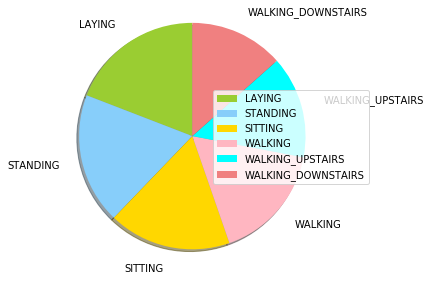

In [12]:
labels=df['labels']
sizes = df['values']
colors = ['yellowgreen', 'lightskyblue', 'gold', 'lightpink', 'cyan', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, labels = labels, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='right')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Data Processing

In [13]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)

In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

encoder.fit(Y_train_label)
y_train = encoder.transform(Y_train_label)

In [15]:
y_train

array([3, 1, 3, ..., 0, 1, 2])

In [16]:
encoder.fit(Y_test_label)
y_test = encoder.transform(Y_test_label)

In [17]:
y_test

array([2, 0, 3, ..., 1, 2, 0])

In [18]:
num_cols = X_train._get_numeric_data().columns
num_cols.size

561

## Model Building for Human Acitivity Recognition

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [20]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [21]:
y_pred = knn.predict(x_test)

In [22]:
print((accuracy_score(y_test, y_pred)*100), '%')

89.98982015609094 %


In [23]:
scores = []
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

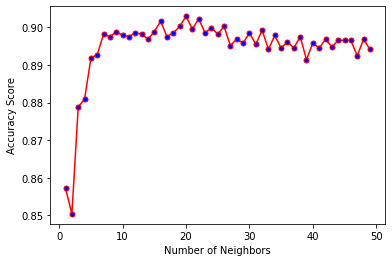

In [24]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o', 
        markersize=5, markerfacecolor='blue')
plt.show()

In [26]:
scores = np.array(scores)
print('Optimal number of neighbors is:', scores.argmax())
print('Accuracy Score:' +str(scores.max()*100),'%')

Optimal number of neighbors is: 19
Accuracy Score:90.29521547336275 %


### Conclusion - We will use KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_label = list(encoder.inverse_transform(y_pred))

In [28]:
y_pred_label

['STANDING',
 'LAYING',
 'WALKING',
 'LAYING',
 'WALKING',
 'WALKING',
 'LAYING',
 'STANDING',
 'WALKING_UPSTAIRS',
 'WALKING_UPSTAIRS',
 'WALKING',
 'STANDING',
 'STANDING',
 'LAYING',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS',
 'WALKING',
 'LAYING',
 'SITTING',
 'LAYING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS',
 'SITTING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'SITTING',
 'LAYING',
 'SITTING',
 'WALKING_UPSTAIRS',
 'STANDING',
 'WALKING_UPSTAIRS',
 'SITTING',
 'STANDING',
 'STANDING',
 'SITTING',
 'SITTING',
 'WALKING',
 'LAYING',
 'STANDING',
 'SITTING',
 'SITTING',
 'STANDING',
 'STANDING',
 'LAYING',
 'STANDING',
 'STANDING',
 'LAYING',
 'LAYING',
 'WALKING_UPSTAIRS',
 'SITTING',
 'STANDING',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'WALKING',
 'WALKING',
 'SITTING',
 'LAYING',
 'LAYING',
 'LAYING',
 'WALKING',
 'LAYING',
 'SITTING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_DOWNSTAIRS',
 'WALKING',
 'SITTING',
 'STANDING',
 'LAYING',

In [30]:
print(confusion_matrix(Y_test_label, y_pred_label))

[[513  13  11   0   0   0]
 [  3 390  97   0   0   1]
 [  0  22 510   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  45 327  48]
 [  0   0   0  39   1 431]]


In [31]:
print(classification_report(Y_test_label, y_pred_label))

                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.92      0.79      0.85       491
          STANDING       0.83      0.96      0.89       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.89      0.92      0.90       471

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947



### Summary :

In this project we designed a robust activity recogonition system based on the date on smartphones.
As you know mobile devices have accelerometer as the sensor which collects the activities.
These activities were classified using K-nearest neighbour. 

If you see the test results it is very clear that we were able classify with maximum accuracy
